In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

guard_size = 10 #размер области
poisson_lam = 0.2 #лямбда для задания пуассоновского распределения значений
radius = 0.3 #радиус блокирующих окружностей
distance = 3 #расстояние между точками
list_point=np.array #массив для дальнейших действий

In [13]:
def plot_circle(x,y,r): #отрисовка круга
    angles=np.linspace(0,2*np.pi,50)
    x_cir=x+r*np.cos(angles)
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

def poisson_point_process(lambda0,area_size): #генерация пуассоновских значений
    N = np.random.poisson(lambda0*area_size**2)
    x = np.random.uniform(0,area_size,size=N)
    y = np.random.uniform(0,area_size,size=N)
    return x,y

In [14]:
#отрисовка прямоугольника вокруг заданного отрезка двух точек
def paint_rectangle(x_point1,y_point1,x_point2,y_point2,angle,radius):
    difference_angle = 2*np.pi - angle #определяем угол поворота против часовой стрелки относительно угла angle
    reverse_angle = np.pi/ 2 - difference_angle #отнимаем от 90 этот угол, чтобы определить на какой угол надо повернуть, чтобы получить отрезок, перпендикулярный исходному 
    opposite_angle=reverse_angle + np.pi #повернём полученный угол на 180 чтобы получить значение угла для перпендикулярного исходному отрезка, но с другой стороны, нежели reverse_angle
    
    #поиск вершин прямоугольника, где радиус это 0.5 стороны прямоугольника
    
    x_rectang_A=x_point1+ radius*np.cos(opposite_angle)
    y_rectang_A=y_point1+ radius*np.sin(opposite_angle)
    x_rectang_B=x_point1+ radius*np.cos(reverse_angle)
    y_rectang_B=y_point1+ radius*np.sin(reverse_angle)
    x_rectang_C=x_point2+ radius*np.cos(reverse_angle)
    y_rectang_C=y_point2+ radius*np.sin(reverse_angle)
    x_rectang_D=x_point2+ radius*np.cos(opposite_angle)
    y_rectang_D=y_point2+ radius*np.sin(opposite_angle)
    
    return x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C,y_rectang_C, x_rectang_D, y_rectang_D


In [15]:
#нахождение расстояние между отрезком AB и точкой C
def check_distance(A,B,C):
    CA=(C-A)/norm(C-A) #координаты вектора СА
    BA=(B-A)/norm(B-A) #координаты вектора ВА
    CB=(C-B)/norm(C-B) #координаты вектора СВ
    AB=(A-B)/norm(A-B) #координаты вектора АВ
    
    if arccos(dot(CA,BA))>1: #если арккосинус скалярного произведения векторов больше единицы то длинна CA и есть искомое расстояние
        return norm(C-A)
    
    if arccos(dot(CB,AB))>1: #аналогично
        return norm(C-B)
    
    return norm(cross(A-B,A-C))/norm(B-A) #формула расстояния между точкой и прямой, заданной вектором


In [16]:
def crossing(x1,y1,x2,y2,x,y,radius): #проверка условия блокировки
    circle_point=[]
    point_1=[]
    point_2=[]
    point_1.extend([x1,y1]) #записываем в массив координаты 1-й точки
    point_2.extend([x2,y2]) #записываем в массив координаты 2-й точки
    
    for i in range(len(x)):
        circle_point.append([x[i],y[i]]) #записываем в массив координаты центров блокирующих окружностей
    
    for i in range(len(x)):
        if (np.round(check_distance(list_point(point_1), list_point(point_2), list_point(circle_point[i])),1)<=radius): #если расстояние между отрезком и центром окружности меньше или равно радиусу то происходит блокировка
            return True

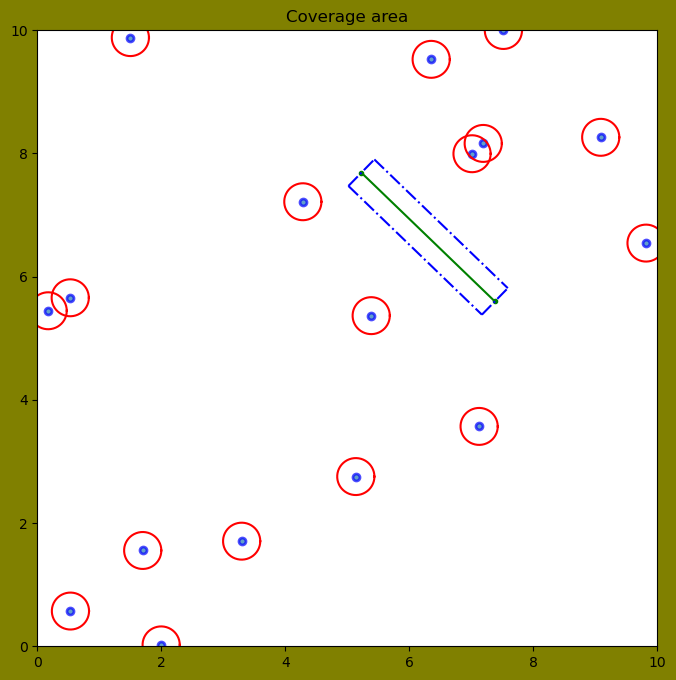

In [17]:
x, y=poisson_point_process(poisson_lam, guard_size) #пуассоновски задаём центры окружности

x1 = np.random.uniform(0,guard_size) #рандомные значения координат
y1 = np.random.uniform(0,guard_size)

angle = np.random.uniform(0,2*np.pi) #случайный угол поворота для нахождения второй координаты отрезка

x2 = x1 + distance * np.cos(angle) #вторая координата отрезка
y2 = y1 + distance * np.sin(angle)

x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C,y_rectang_C, x_rectang_D, y_rectang_D=paint_rectangle(x1,y1,x2,y2,angle,radius) #получение координат для отрисовки зоны блокировки вокруг отрезка

#отрисовка
plt.figure(dpi=100, figsize=(8,8), facecolor='olive')
plt.title('Coverage area')
#отрисовка блокирующих объектов с помощью функции отрисовки круга
plt.plot(x,y,'.', alpha=0.7,label='fist',lw=5,mec='b',mew=2,ms=10) #центры окружностей
for i in range(len(x)):
    plot_circle(x[i],y[i], radius)
plt.plot([x1,x2],[y1,y2], '.-g')

#отрисовка сторон прямоугольника
plt.plot([x_rectang_A,x_rectang_B],[y_rectang_A,y_rectang_B], '-.b')
plt.plot([x_rectang_A,x_rectang_D],[y_rectang_A,y_rectang_D], '-.b')
plt.plot([x_rectang_B,x_rectang_C],[y_rectang_B,y_rectang_C], '-.b')
plt.plot([x_rectang_D,x_rectang_C],[y_rectang_D,y_rectang_C], '-.b')
#задание границ рисунка
plt.xlim(0,guard_size)
plt.ylim(0,guard_size)
plt.savefig('plot_lab4_1.png') #вывод в файл

In [24]:
def check_pol(line_d1, line_d2,distance,angle,fixang):
    x1, y1 = line_d1 #координаты первой точки
    x2, y2 = line_d2 #координаты второй точки
    
    atan1=math.atan2((y2-y1),(x2-x1)) #получение угла, на который повёрнута точка x2 относительно x1
    
    if atan1<0:
        atan1=2*np.pi+atan1 #функция atan2 учитывает отрицательные значения; когда угл находится в 3 и 4 четвертях поворота относительно начала координат, значение будет отрицательным, тогда чтобы получить этот угол в обозначениях от 0 до 2пи нужно отнять его от 2пи
    d1= atan1>angle and atan1<(angle+fixang) #если угол попадает в диапазон поворота зоны, то видимость есть и d1=true
    
    if d1==True:
        return True
    else:
        return False

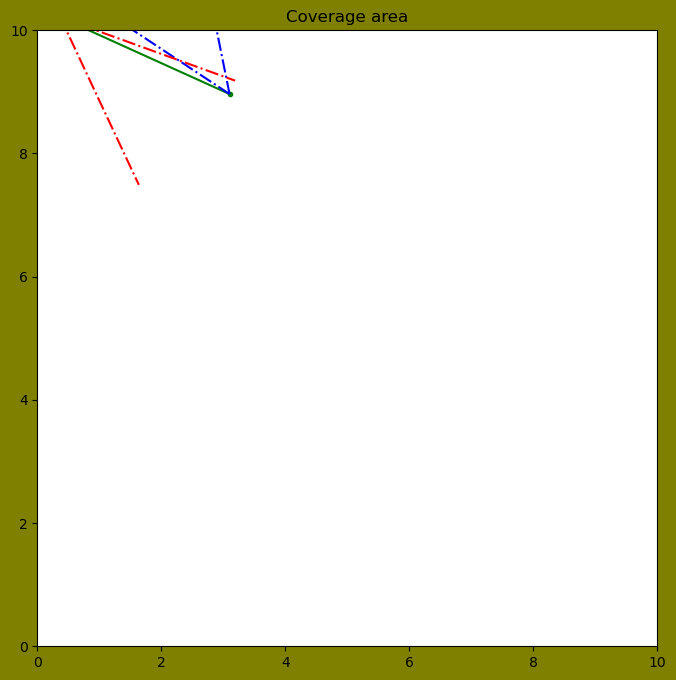

In [25]:
x1 = np.random.uniform(0,guard_size)
y1 = np.random.uniform(0,guard_size)

angle = np.random.uniform(0,2*np.pi)

x2 = x1 + distance * np.cos(angle)
y2 = y1 + distance * np.sin(angle)

angle1 = np.random.uniform(0,2*np.pi) #случайный угол поворота первого сектора
angle2 = np.random.uniform(0,2*np.pi) #случайный угол поворота второго сектора

distance1=np.random.uniform(distance,1.5*distance) #случайная длина краёв зоны от длины отрезка до 1.5 длины отрезка
fixang=np.pi/4 # величина угла сектора

x31=x1+distance*np.cos(angle1) #расчёт координат сторон сектора
y31=y1+distance*np.sin(angle1)
x41=x1+distance*np.cos(angle1+fixang)
y41=y1+distance*np.sin(angle1+fixang)

x32=x2+distance*np.cos(angle2)
y32=y2+distance*np.sin(angle2)
x42=x2+distance*np.cos(angle2+fixang)
y42=y2+distance*np.sin(angle2+fixang)

poll1 = check_pol([x1,y1], [x2,y2],distance1,angle1,fixang) #значения попадания в сектор (могут быть True и False)
poll2 = check_pol([x2,y2], [x1,y1],distance1,angle2,fixang)

plt.figure(dpi=100, figsize=(8,8), facecolor='olive') #отрисовка секторов
plt.title('Coverage area')
plt.plot([x1,x2],[y1,y2], '.-g') #отрезок от x1y1 до x2y2

plt.plot([x1,x31],[y1,y31], '-.b')
plt.plot([x1,x41],[y1,y41], '-.b')
plt.plot([x2,x32],[y2,y32], '-.r')
plt.plot([x2,x42],[y2,y42], '-.r')
plt.xlim(0,guard_size)
plt.ylim(0,guard_size)
plt.savefig('plot_lab4_2.png')


In [23]:
#Иммитационное моделирвоание
num_experiments = 1000
summa = 0
for i in range (num_experiments):
    x, y=poisson_point_process(poisson_lam, guard_size)
    
    x1 = np.random.uniform(0,guard_size)
    y1 = np.random.uniform(0,guard_size)
    
    angle = np.random.uniform(0,2*np.pi)
    
    x2 = x1 + distance * np.cos(angle)
    y2 = y1 + distance * np.sin(angle)
    
    angle1 = np.random.uniform(0,2*np.pi)
    angle2 = np.random.uniform(0,2*np.pi)
    
    distance1=np.random.uniform(distance,1.5*distance)
    fixang=np.pi/4
    
    poll1 = check_pol([x1,y1], [x2,y2],distance1,angle1,fixang) #проверка нахождения точки х2у2 в секторе точки х1у1
    poll2 = check_pol([x2,y2], [x1,y1],distance1,angle2,fixang) #проверка нахождения точки х1у1 в секторе точки х2у2
    
    fl=True #задаём переменную для проверки
    
    if (crossing(x1,y1,x2,y2,x,y,radius)):
        fl=False #если произошла блокировка, меняем значение переменной на False
    
    if fl==True and poll1==True and poll2==True: 
        summa+=1 #если значение переменной True, а так же обе проверки нахождения в секторах дали True, то прибавляем 1 к числу подсчётов удачных реализаций
      
print('Probability-1 = ', summa/num_experiments) #чтобы получить значение вероятности, делим количество удачных реализаций на количество экспериментов


Probability-1 =  0.008


In [22]:
#Вероятность по аналитической формуле из презентации
s_B=2*radius*distance
lambda1=poisson_lam*s_B
p_block=1-math.exp(-lambda1)
print('Probability-1 by formula = ',(1-p_block)*(fixang/(2*np.pi))**2)

Probability-1 by formula =  0.01090119259485986
